Keras is a high level python API which uses either Theano or Tensorflow or CNTK (Microsoft Cognitive Toolkit) as back-end to build and train neural networks. This tutorial was made to self-teach a simple CNN using Keras.

In [54]:
import keras

Here, I have used MNIST database (Modified National Institute of Standards and Technology database) which contains handwritten images from 0 to 9. There are 60,000 images in training set and 10,000 for test set.

In [55]:
from keras.datasets import mnist

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras import backend as K
import seaborn as sns

In [57]:
import numpy as np
seed=101
np.random.seed(seed)
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

X_train and X_test are 3-dimensional array of number of instance, image width and height.

In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
y_train.shape

(60000,)

In [61]:
X_test.shape

(10000, 28, 28)

In order, Keras with Tensorflow back-end accepts the images we reshape our data.

In [62]:
width, height= 28,28
#as the images are grayscale, only one channel is present
channel=1
x_train=X_train.reshape(X_train.shape[0],width, height,channel).astype('float32')
x_test=X_test.reshape(X_test.shape[0],width, height,channel).astype('float32')

In [63]:
x_train.shape

(60000, 28, 28, 1)

Our input shape is width, height and number of channels of the images.

In [64]:
input_shape= (width,height,1)

Next, we normalize the pixels values to the range of 0 and 1. 

In [65]:
x_train/=255
x_test/=255

Next, I checked first nine x_train samples to see how the data looks like. Also, I checked its corresponding label.

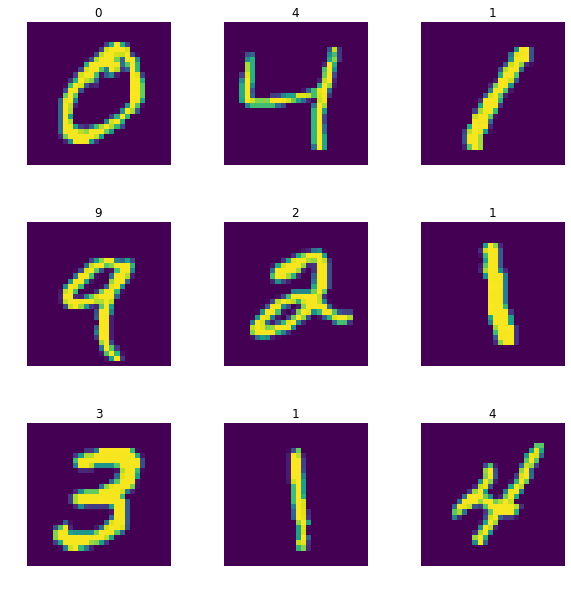

In [66]:
plt.subplots(figsize=(10,10))
plt.subplots_adjust (hspace=0.4, wspace=0.2)
i=0

while i<9:
    i+=1
    plt.subplot(3,3,i)
    plt.imshow(x_train[i][:,:,0])
    plt.axis('off')
    plt.title(y_train[i])

Next, I checked how the distribution of digits looks like.

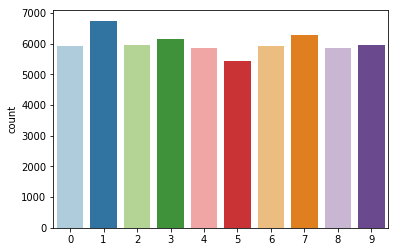

In [67]:
sns.countplot(y_train,palette='Paired')

In [68]:
y_train.shape

(60000,)

In [69]:
y_train[7]

3

As the labels are in integer form from 0 to 9 and we have a multi-class classification problem, we use one hot encoding to convert them into binary matrix of 10 dimensions(=number of class labels), which is done below.

In [70]:
num_classes=10
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)
print(y_train[7])
y_train.shape

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


(60000, 10)

### Model architecture

Next step is defining the model architecture. In this we decide the architecture of the model i.e. we decide the model (in most cases we take sequential model-which is a linear stack of layers i.e. you keep adding layers one after the other), how many nodes, how many hidden layers we need in each layer, activation function, etc. 

Here, in the first input layer we have to mention the input shape which is the dimenion of our input data. Convolution layer applies some **convolution filters** (also called kernels) to the image. Each filter performs some mathematical operation on each subregion of the image that produces a single value that is the output feature map. In this operation, the filter slides over the image and everytime it calculates a dot product that gives a single number for each operation. The final output is a matrix. The number of pixels by which the window slides is called **stride**. This operation of convolving the filter on the image is called **convolution**. If the image is of dimension NxN with C number of channels, then we use a filter with dimension of FxF and the number of channels for filter is equal to C. After every convolution, the image size shrinks and becomes (N-F)/S +1. In order to avoid this and to avoid loss of information in the edges of images, we use **padding**. If we use a padding of 2 on both side then the size of the output layer stays the same as the input layer with (N-F+2P)/S+1. 

There are many ways to initialize the parameters. Here, I have iniatialized weights using 'He-Normal Initialization'. This helps in attaining minima for cost function faster and more efficiently.

The convolution layers then apply **activation function** on the output matrix that introduces non-linearity in the model. The most common one is **ReLU** activation function (Rectified Linear Unit) . 

**Batchnormalization** is a technique to mornalize the input for each layer. It improves speed, performance and stability of the neural network.

The number 32,3,3 used here corresponds to the number of convolution filters, the number of rows in each convolution kernel and then number of columns in each convolution kernel respectively. 
**Pooling layer** can be added after Convolution layer. It reduces the number of parameters, hence overfitting and also reduces computation, decreasing training time. The image data extracted by convolution layers is downsampled by this. One can either use MaxPooling2D which extracts subfeatures of the image, keeps the maximum value and discards the rest or Average Pooling which takes the average of the features. The pooling layers can be of Fx F dimension and slides over the image of dimensions NxN and picks either the maximum or the average from FxF region of the image. Unlike convolution layer, maxpooling does not have specified parameters like weights and bias.
**Dropout layer** is important for regularization as it reduces overfitting. Dropout layer randomly silences some nodes in the layer, i.e. the weights associated are made 0. Also reduces computation thereby increasing the training speed of the neural network. 

Next, the weights from convolution layer has to be flattened, i.e. made into a single dimension, before passing to the **Dense layer**, where every node is connected to all the nodes in the other layer. 

As there are multiple classes in this dataset we have used 'Softmax' activation. For binary classification a 'Sigmoid' activation can be used instead.


In [19]:
model=Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),input_shape=input_shape, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.30))
model.add(Dense(num_classes, activation='softmax'))

### Compiling the model

The next step is compiling the model where we use gradient descent for the entire neural network. In this step we basically define the method for backpropagation by deciding the optimizer and loss. Backpropagation helps in finding the best values for our parameters(weights and bias) using gradient descent mechanism. The optimizer basically sets the optimal weights. It also updates the learning rate for gradient descent. There are also loss function and a metric to decide the evaluation criteria. Gradient descent tries to minimize the loss. We have used 'categorical_crossentropy' as loss function because of multiple classes, 'binary_crossentropy' can be used instead for binary classfication. We have used a popular optimizer 'adam'.

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Fitting the model

Then we fit the model on training data. Fitting applies backpropogation and gradient descent to the data to update the weights. Here to the fit function we also pass the batch size, epochs and validation split size. One epoch represents the number of times forward and backward propogation takes place such that network has seen the full dataset. Or in other words, 1 pass through the entire data constitutes 1 epoch.Batch size is the number of observations used after which the weights will be updated. Batch size is usually in power of 2, ranging 64,128,256,512 (2^6,2^7,2^8,2^9). Code runs faster when the power of 2 is employed and the batch size is within the range. I have picked early stopping monitor which stops if in 3 epochs there is no improvement in the validation data's metric.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.3, random_state=1, shuffle=True, stratify=y_train)

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_12 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
__________

In [77]:
reduced_learning_rate = ReduceLROnPlateau(patience=2,monitor='val_loss',factor=0.2,min_lr=0.0001)
batch_size=128
epochs= 20
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val,Y_val),shuffle=True, verbose=1,callbacks=[reduced_learning_rate])

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 501s 12ms/step - loss: 0.1711 - acc: 0.9515 - val_loss: 0.0483 - val_acc: 0.9852
Epoch 2/20
42000/42000 [==============================] - 597s 14ms/step - loss: 0.0575 - acc: 0.9838 - val_loss: 0.0358 - val_acc: 0.9883
Epoch 3/20
42000/42000 [==============================] - 495s 12ms/step - loss: 0.0430 - acc: 0.9874 - val_loss: 0.0317 - val_acc: 0.9897
Epoch 4/20
42000/42000 [==============================] - 499s 12ms/step - loss: 0.0346 - acc: 0.9893 - val_loss: 0.0243 - val_acc: 0.9924
Epoch 5/20
42000/42000 [==============================] - 497s 12ms/step - loss: 0.0285 - acc: 0.9912 - val_loss: 0.0255 - val_acc: 0.9916
Epoch 6/20
42000/42000 [==============================] - 496s 12ms/step - loss: 0.0250 - acc: 0.9923 - val_loss: 0.0356 - val_acc: 0.9889
Epoch 7/20
42000/42000 [==============================] - 497s 12ms/step - loss: 0.0165 - acc: 0.9952 - val_loss: 0.

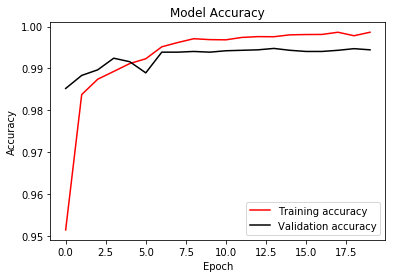

In [79]:
plt.plot(history.history['acc'],color='r', label="Training accuracy")
plt.plot(history.history['val_acc'], color='k', label="Validation accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

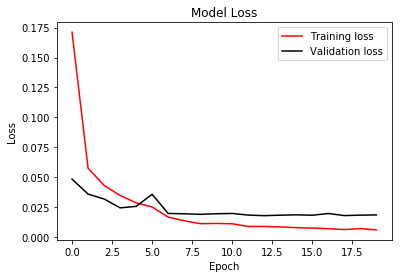

In [80]:
plt.plot(history.history['loss'], color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [81]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.014480746724100027
Test accuracy: 0.9951


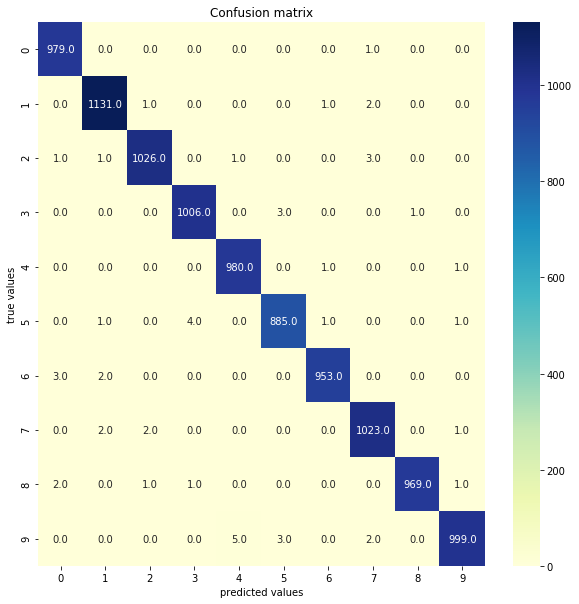

In [84]:
from sklearn.metrics import confusion_matrix
y_pred=model4.predict(x_test)
y_pred_classes=np.argmax(y_pred, axis=1)
y_true_classes=np.argmax(y_test, axis=1)
confusion_mtx=confusion_matrix(y_true_classes,y_pred_classes)
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusion_mtx,fmt='.1f', annot=True, cmap="YlGnBu")
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.title('Confusion matrix')
plt.show()